In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy 
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.spatial.distance import cosine, correlation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron

In [3]:
df  = pd.read_csv('/Users/hiteshbhatia/Downloads/chs2017_public.csv')

**Pre Processing the Data**
We will first proceed with doing the analysis on the HIV Testing. We will be analysing the HIV with the general health as the target variable.

In [5]:
hiv_df = df[['cid','hiv12months17','everhivtest17','generalhealth']]
#Checking the null values
hiv_df.isnull().sum()

cid                0
hiv12months17    229
everhivtest17    305
generalhealth     34
dtype: int64

In [6]:
#Dropping all the columns having the Null values
hiv_df = hiv_df.dropna()
hiv_df.describe()

,cid,hiv12months17,everhivtest17,generalhealth
count,9.520000e+03,9520.000000,9520.000000,9520.000000
mean,1.808544e+06,1.667227,1.347899,2.742542
std,5.563986e+03,0.471231,0.476329,1.134970
min,1.800001e+06,1.000000,1.000000,1.000000
25%,1.802524e+06,1.000000,1.000000,2.000000
50%,1.810954e+06,2.000000,1.000000,3.000000
75%,1.813429e+06,2.000000,2.000000,4.000000
max,1.815905e+06,2.000000,2.000000,5.000000


In [7]:
corr_1 = hiv_df.corr()
corr_1

,cid,hiv12months17,everhivtest17,generalhealth
cid,1.000000,-0.132463,-0.171941,-0.129683
hiv12months17,-0.132463,1.000000,0.515830,0.007537
everhivtest17,-0.171941,0.515830,1.000000,0.040166
generalhealth,-0.129683,0.007537,0.040166,1.000000


It seems like the variable **hiv12months17** (Have you had an HIV test in the last 12 months?) is very less correlated and thus can be dropped.

# Prediction / RMSE

In [8]:
#[1]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

#function for rmse calculation of model
def model_apply(x,y,algo,n):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(x_train)
    # Apply transform to both the training set and the test set.
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    pca = PCA(n_components=n,tol=.95)
    pca.fit(x_test)
    print(pca.explained_variance_ratio_) 
    
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
#     principalDf = pd.DataFrame(data = x_train
#              , columns = ['pc1', 'pc2','pc3'])
#     print(principalDf)

    #model selection
    if algo==1:
        model=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200)
    elif algo==2:
        model=GaussianNB()
    elif algo==3:
        model=DecisionTreeClassifier()
    elif algo==4:
        model=svm.SVC(gamma='scale')
    elif algo==5:
        model=Perceptron(tol=1e-3, random_state=0)
        
        # Train the model using the training sets
    model.fit(x_train,y_train.values.ravel())

    # Predict Output
    y_pred = model.predict(x_test)
    print ("Predicted Value:", y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [10]:
#preparing training and test data
x=hiv_df[["everhivtest17"]] 
y=hiv_df[["generalhealth"]] 

In [11]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.31890756302521006
[[  0   0 392   0   0]
 [  0   0 619   0   0]
 [  0   0 759   0   0]
 [  0   0 475   0   0]
 [  0   0 135   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       392
         2.0       0.00      0.00      0.00       619
         3.0       0.32      1.00      0.48       759
         4.0       0.00      0.00      0.00       475
         5.0       0.00      0.00      0.00       135

    accuracy                           0.32      2380
   macro avg       0.06      0.20      0.10      2380
weighted avg       0.10      0.32      0.15      2380



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1599043716016006

**Analysing the Immunization Data**

In [14]:
imm_df = df[['cid','fluvaccineshot','generalhealth']]
imm_df.isnull().sum()

cid                0
fluvaccineshot    65
generalhealth     34
dtype: int64

In [15]:
imm_df = imm_df.dropna()
imm_df.describe()

,cid,fluvaccineshot,generalhealth
count,9.906000e+03,9906.000000,9906.000000
mean,1.808489e+06,1.519180,2.745003
std,5.571799e+03,0.499657,1.136600
min,1.800001e+06,1.000000,1.000000
25%,1.802502e+06,1.000000,2.000000
50%,1.810904e+06,2.000000,3.000000
75%,1.813408e+06,2.000000,4.000000
max,1.815905e+06,2.000000,5.000000


In [16]:
corr_2 = imm_df.corr()
corr_2

,cid,fluvaccineshot,generalhealth
cid,1.000000,0.120747,-0.125239
fluvaccineshot,0.120747,1.000000,-0.080273
generalhealth,-0.125239,-0.080273,1.000000


In [19]:
#preparing training and test data
x=imm_df[["fluvaccineshot"]] 
y=imm_df[["generalhealth"]] 

In [20]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.31085991118288253
[[  0   0 404   0   0]
 [  0   0 663   0   0]
 [  0   0 770   0   0]
 [  0   0 485   0   0]
 [  0   0 155   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       404
         2.0       0.00      0.00      0.00       663
         3.0       0.31      1.00      0.47       770
         4.0       0.00      0.00      0.00       485
         5.0       0.00      0.00      0.00       155

    accuracy                           0.31      2477
   macro avg       0.06      0.20      0.09      2477
weighted avg       0.10      0.31      0.15      2477



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1688322174389332

**Analysing the Sexual Behavior**

In [24]:
sex_df = df[['cid','sexbehav_active17','sexuallyactive17','imputed_sexpartner','wsw','wswexclusive','msm','msmexclusive','condom17','condomusetrend','analsex','analsexcondomuse17','bthcntrltype17','bthcontrollastsex17','everheardofprep','everusedprep17','generalhealth']]
sex_df.isnull().sum()

cid                       0
sexbehav_active17      4068
sexuallyactive17        820
imputed_sexpartner        0
wsw                    7063
wswexclusive           7056
msm                    7030
msmexclusive           7021
condom17               4205
condomusetrend         5121
analsex                4227
analsexcondomuse17     9563
bthcntrltype17         6056
bthcontrollastsex17    6022
everheardofprep        4097
everusedprep17         8462
generalhealth            34
dtype: int64

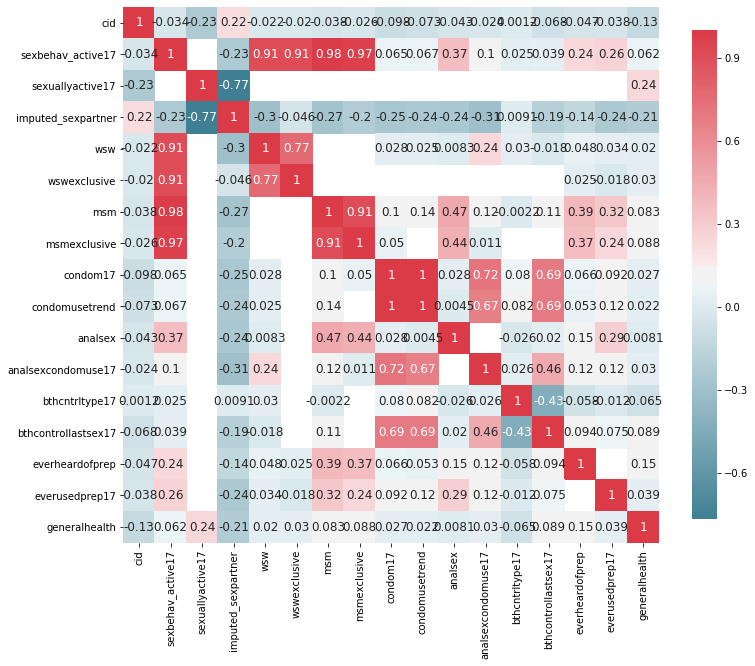

In [25]:
plot_correlation_map(sex_df)

Among all the features in the Sexual Behavior, only 3 features looks useful to me. **imputed_sexuallyactive18**(Sexually active in past 12 months), **imputed_sexpartner** (Number of male and female sex partners in the past 12 months) and **pcpsexhistory** (Thinking about the last time you visited your personal doctor or health care provider, did he or she ask you any questions about your sexual history?).

In [26]:
sex_df = df[['cid','sexuallyactive17','imputed_sexpartner','generalhealth']]
sex_df.isnull().sum()


cid                     0
sexuallyactive17      820
imputed_sexpartner      0
generalhealth          34
dtype: int64

In [27]:
sex_df_f = sex_df.dropna()
sex_df_f.describe()

,cid,sexuallyactive17,imputed_sexpartner,generalhealth
count,9.155000e+03,9155.000000,9155.000000,9155.000000
mean,1.808534e+06,1.353140,1.823921,2.758165
std,5.555284e+03,0.477972,0.792978,1.139235
min,1.800001e+06,1.000000,1.000000,1.000000
25%,1.802536e+06,1.000000,1.000000,2.000000
50%,1.810930e+06,1.000000,2.000000,3.000000
75%,1.813412e+06,2.000000,2.000000,4.000000
max,1.815905e+06,2.000000,4.000000,5.000000


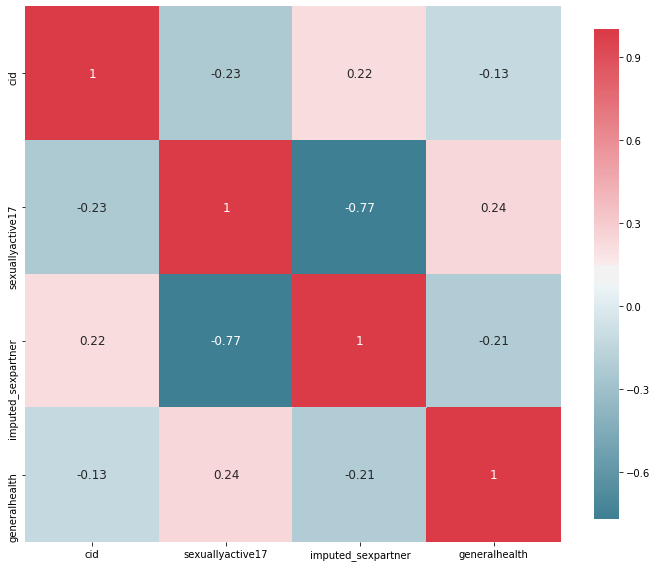

In [28]:
plot_correlation_map(sex_df)

Let us use the above 3 features to predict the general health.

In [29]:
#preparing training and test data
x=sex_df_f[['sexuallyactive17','imputed_sexpartner']] 
y=sex_df_f[["generalhealth"]] 

In [31]:
model_apply(x,y,3,2)

[0.88454331 0.11545669]
Predicted Value: [3. 3. 2. ... 3. 3. 3.]
Accuracy: 0.3162953254696374
[[  0  36 320   0   0]
 [  0  52 540   0   0]
 [  0  45 672   0   0]
 [  0  17 448   0   0]
 [  0   4 155   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       356
         2.0       0.34      0.09      0.14       592
         3.0       0.31      0.94      0.47       717
         4.0       0.00      0.00      0.00       465
         5.0       0.00      0.00      0.00       159

    accuracy                           0.32      2289
   macro avg       0.13      0.21      0.12      2289
weighted avg       0.19      0.32      0.18      2289



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1586663217941302

**Analysing the Cancer Screening Data**

Most of the features in Cancer Screening have a huge amount of Null values, thus we skip this for our Analysis.

# Clubbing it All together

In [36]:
club_df = df[['cid','everhivtest17','sexuallyactive17','imputed_sexpartner','fluvaccineshot','generalhealth']]
club_df.isnull().sum()

cid                     0
everhivtest17         305
sexuallyactive17      820
imputed_sexpartner      0
fluvaccineshot         65
generalhealth          34
dtype: int64

In [37]:
club_df = club_df.dropna()
club_df.describe()

,cid,everhivtest17,sexuallyactive17,imputed_sexpartner,fluvaccineshot,generalhealth
count,8.842000e+03,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000
mean,1.808573e+06,1.337819,1.349355,1.831034,1.517191,2.757295
std,5.551952e+03,0.472993,0.476793,0.795841,0.499733,1.138381
min,1.800001e+06,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.802546e+06,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.810969e+06,1.000000,1.000000,2.000000,2.000000,3.000000
75%,1.813427e+06,2.000000,2.000000,2.000000,2.000000,4.000000
max,1.815905e+06,2.000000,2.000000,4.000000,2.000000,5.000000


In [38]:
#preparing training and test data
x=club_df[['everhivtest17','sexuallyactive17','imputed_sexpartner','fluvaccineshot']] 
y=club_df[["generalhealth"]] 

In [112]:
model_apply(x,y,3,5)

[0.41515044 0.23450982 0.15343305 0.13997805 0.05692863]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.33648881239242684
[[  3 106 218  13   0]
 [  7 216 373  24   0]
 [  1 192 525  49   0]
 [  1 104 308  38   0]
 [  0  25 102  19   0]]
              precision    recall  f1-score   support

         1.0       0.25      0.01      0.02       340
         2.0       0.34      0.35      0.34       620
         3.0       0.34      0.68      0.46       767
         4.0       0.27      0.08      0.13       451
         5.0       0.00      0.00      0.00       146

    accuracy                           0.34      2324
   macro avg       0.24      0.23      0.19      2324
weighted avg       0.29      0.34      0.27      2324



1.17361263170363

**Correlating Number of Sex Partners with the HIV**

In [39]:
hiv_sp_df = df[['everhivtest17','imputed_sexpartner']]
hiv_sp_df.isnull().sum()

everhivtest17         305
imputed_sexpartner      0
dtype: int64

In [40]:
hiv_sp_df = hiv_sp_df.dropna()
hiv_sp_df.describe()

,everhivtest17,imputed_sexpartner
count,9700.000000,9700.000000
mean,1.349072,1.825361
std,0.476701,0.791891
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,4.000000


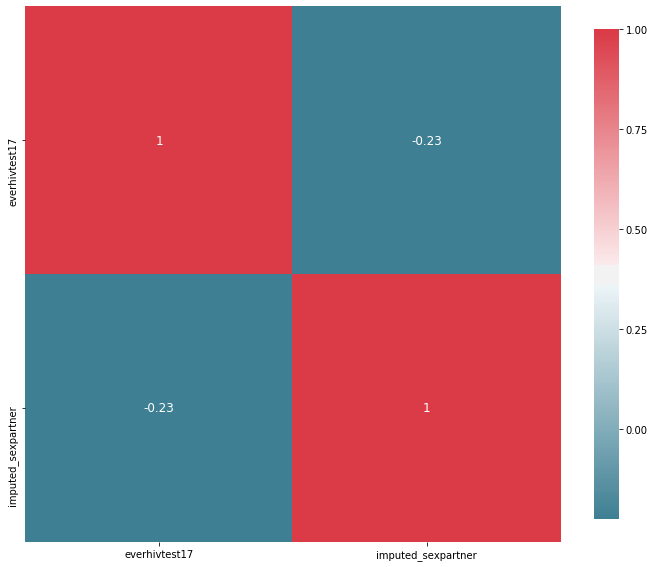

In [41]:
plot_correlation_map(hiv_sp_df)

In [43]:
#preparing training and test data
x=hiv_sp_df[["everhivtest17"]] 
y=hiv_sp_df[["imputed_sexpartner"]] 

In [117]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [2. 2. 1. ... 2. 1. 2.]
Accuracy: 0.5249278945199836
[[445 468   0   0]
 [333 829   0   0]
 [ 35 101   0   0]
 [ 60 156   0   0]]
              precision    recall  f1-score   support

         1.0       0.51      0.49      0.50       913
         2.0       0.53      0.71      0.61      1162
         3.0       0.00      0.00      0.00       136
         4.0       0.00      0.00      0.00       216

    accuracy                           0.52      2427
   macro avg       0.26      0.30      0.28      2427
weighted avg       0.45      0.52      0.48      2427



0.9533840147191706